In [6]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess
import numpy as np
os.chdir("/home/jok120/sml/proj/attention-is-all-you-need-pytorch/")

In [11]:
basic_train_cmd = "/home/jok120/build/anaconda3/envs/pytorch_src2/bin/python " +\
                  "~/sml/proj/attention-is-all-you-need-pytorch/train.py " +\
                  "{data} {name} -e 1000 -b 1 -nws {warmup} -cl " +\
                  "-dm {dm} -dih {dih} --early_stopping 10 --train_only --combined_loss"

In [20]:
# params = {"warmup": [1, 10, 100, 250, 500, 1000 ],
#           "dm": [128, 256, 512, 1024, 2048],
#           "dih": [512, 1024, 2048],
#           "dwv": [8, 20, 24, 48, 128, 256]}
# params_repeat = {"warmup": [5, 100, 500, 1000],
#           "dm": [128, 256, 512, 1024, 2048],
#           "dih": [512, 1024, 2048]}
param = {"warmup": [4000, 1000, 2000],
          "dm": [8, 12, 20, 56, 128, 512, 1024, 2048],
          "dih": [2048, 1024, 512]}
# data_path = "data/data_190529_multi_helix_turns.tch"
# data_path = "data/data_190530_multi_helix_turns_overfit.tch"
data_path = "data/data_190530_query1_overfit.tch"
name = "0531-q1-{:03}"

In [21]:
cmd[173:-47]

'-nws 1000 -cl -dm 56 -dih 2048 -'

In [22]:
i = 3
cmds = []
for dih in param["dih"]:
    for warmup in param["warmup"]:
        for dm in param["dm"]:
            cmd = basic_train_cmd.format(data=data_path, name=name.format(i),
                                         warmup=warmup, dm=dm, dih=dih)
            cmds.append(cmd)
            print(cmd[173:-47] + f" logs/{name}.log".format(i))
            with open("logs/" + name.format(i) + ".log", "w") as log:
                subprocess.call(cmd, stdout=log, shell=True)
            i += 1

-nws 4000 -cl -dm 8 -dih 2048 - logs/0531-q1-003.log
-nws 4000 -cl -dm 12 -dih 2048 - logs/0531-q1-004.log
-nws 4000 -cl -dm 20 -dih 2048 - logs/0531-q1-005.log
-nws 4000 -cl -dm 56 -dih 2048 - logs/0531-q1-006.log
-nws 4000 -cl -dm 128 -dih 2048 - logs/0531-q1-007.log
-nws 4000 -cl -dm 512 -dih 2048 - logs/0531-q1-008.log
-nws 4000 -cl -dm 1024 -dih 2048 - logs/0531-q1-009.log
-nws 4000 -cl -dm 2048 -dih 2048 - logs/0531-q1-010.log
-nws 1000 -cl -dm 8 -dih 2048 - logs/0531-q1-011.log
-nws 1000 -cl -dm 12 -dih 2048 - logs/0531-q1-012.log
-nws 1000 -cl -dm 20 -dih 2048 - logs/0531-q1-013.log
-nws 1000 -cl -dm 56 -dih 2048 - logs/0531-q1-014.log
-nws 1000 -cl -dm 128 -dih 2048 - logs/0531-q1-015.log
-nws 1000 -cl -dm 512 -dih 2048 - logs/0531-q1-016.log
-nws 1000 -cl -dm 1024 -dih 2048 - logs/0531-q1-017.log
-nws 1000 -cl -dm 2048 -dih 2048 - logs/0531-q1-018.log
-nws 2000 -cl -dm 8 -dih 2048 - logs/0531-q1-019.log


KeyboardInterrupt: 

# Analysis

In [6]:
from glob import glob
import seaborn as sns
sns.set(style="darkgrid")

In [25]:
result_files = sorted(glob("logs/0530-3p7k*.train"))

In [26]:
dfs = [pd.read_csv(f) for f in result_files]
titles = [f[5:-6] for f in result_files]
dfes = []
for df in dfs:
    df["rmse"] = np.sqrt(df["mse"])
    dfes.append(df[df["is_end_of_epoch"]].reset_index())

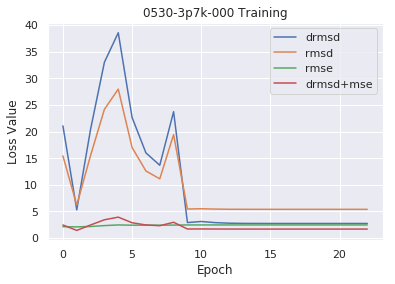

In [27]:
def do_plot(df, title):
    sns.lineplot(x=df.index, y="drmsd", data=df, label="drmsd")
    sns.lineplot(x=df.index, y="rmsd", data=df, label="rmsd")
    sns.lineplot(x=df.index, y="rmse", data=df, label="rmse")
    sns.lineplot(x=df.index, y="combined", data=df, label="drmsd+mse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend()
    plt.title("{} Training".format(title))
do_plot(dfes[0], titles[0])

In [28]:
mins = []
for df, title in zip(dfes, titles):
    row = df[df["combined"] == df["combined"].min()]
    row["title"] = title[:]
    mins.append(row)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
mins_df = pd.concat(mins)

In [30]:
mins_df.sort_values("combined", inplace=True)

In [45]:
do_plot(dfes[232], titles[232])

IndexError: list index out of range

In [31]:
mins_df

,index,drmsd,mse,rmsd,combined,lr,is_val,is_end_of_epoch,time,rmse,title
232,465,1.837088,2.237380,4.660412,0.674163,0.000123,False,True,1.559281e+09,1.495787,0530-3p7kc-003
190,381,1.687398,2.360527,5.166474,0.695594,0.000807,False,True,1.559281e+09,1.536401,0530-3p7kc-001
76,153,2.021644,2.356861,4.636816,0.715568,0.000609,False,True,1.559277e+09,1.535207,0530-3p7kb-042
107,215,2.135029,2.472481,4.540528,0.751560,0.001291,False,True,1.559281e+09,1.572413,0530-3p7kc-000
31,63,2.083386,2.561187,4.281431,0.770508,0.000022,False,True,1.559280e+09,1.600371,0530-3p7kb-059
252,505,2.259470,2.518112,4.555572,0.770745,0.000063,False,True,1.559283e+09,1.586856,0530-3p7kc-011
185,371,1.971725,2.596344,4.603945,0.772319,0.000520,False,True,1.559277e+09,1.611318,0530-3p7kb-043
64,129,2.046930,2.577891,4.528007,0.772406,0.000182,False,True,1.559247e+09,1.605581,0530-3p7k-003
262,525,2.248135,2.573027,4.559482,0.783765,0.000139,False,True,1.559287e+09,1.604066,0530-3p7kc-027
116,233,2.122737,2.616809,4.584381,0.786873,0.000231,False,True,1.559255e+09,1.617655,0530-3p7k-058


In [32]:
names =  [int(t[-3:]) for t in mins_df["title"][:10]]
print(names)

[3, 1, 42, 0, 59, 11, 43, 3, 27, 58]


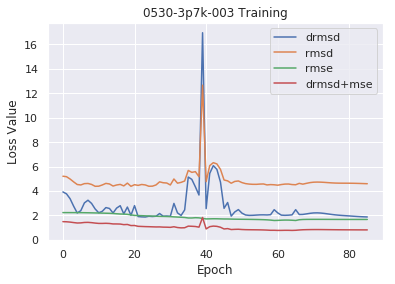

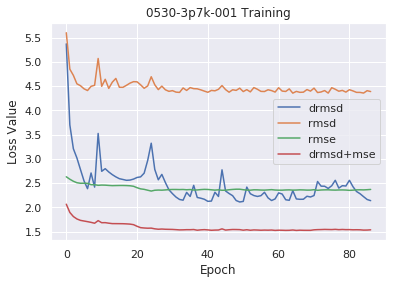

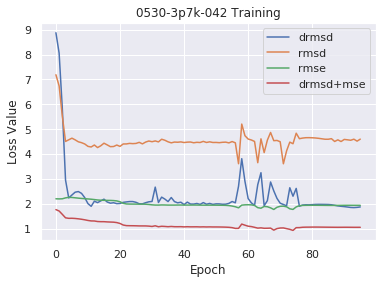

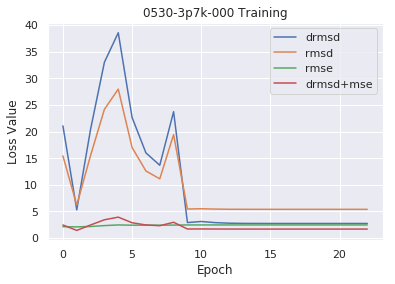

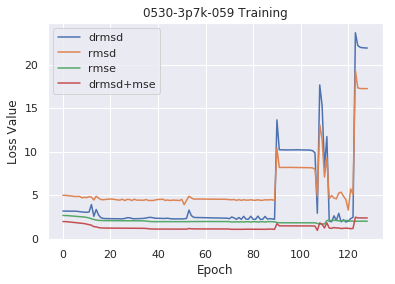

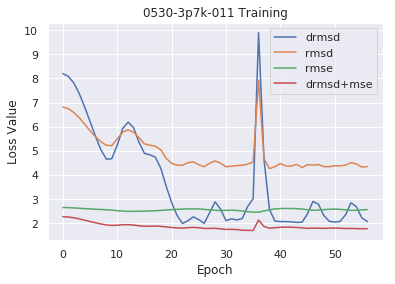

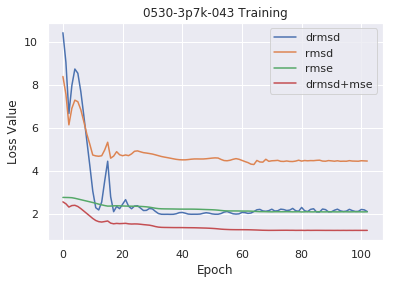

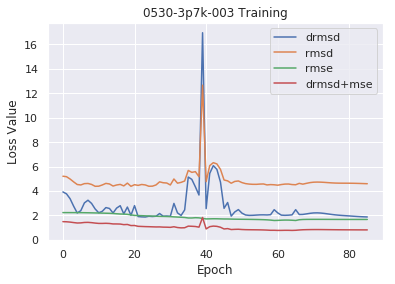

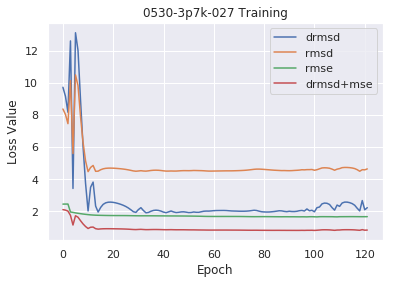

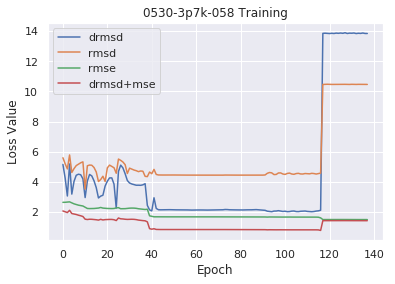

In [33]:
for n in names:
    do_plot(dfes[n], titles[n])
    plt.show()

In [34]:
train_logs =  [f"logs/{t}.log" for t in mins_df["title"][:10]]
train_logs

['logs/0530-3p7kc-003.log',
 'logs/0530-3p7kc-001.log',
 'logs/0530-3p7kb-042.log',
 'logs/0530-3p7kc-000.log',
 'logs/0530-3p7kb-059.log',
 'logs/0530-3p7kc-011.log',
 'logs/0530-3p7kb-043.log',
 'logs/0530-3p7k-003.log',
 'logs/0530-3p7kc-027.log',
 'logs/0530-3p7k-058.log']

In [35]:
def get_arg(namespace, arg):
    pattern = f"{arg}=(.+?),"
    return re.search(pattern, namespace).group(1)

In [36]:
for row in mins:
    t = row["title"].item()
    with open(f"logs/{t}.log", "r") as f:
        args = f.readline()
    for a in ["d_model", "n_warmup_steps", "d_inner_hid"]:
        row[a] = get_arg(args, a)

/home/jok120/build/anaconda3/envs/pytorch_src2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
mins = pd.concat(mins)
mins.sort_values("combined", inplace=True)

In [38]:
mins

,index,drmsd,mse,rmsd,combined,lr,is_val,is_end_of_epoch,time,rmse,title,d_model,n_warmup_steps,d_inner_hid
232,465,1.837088,2.237380,4.660412,0.674163,0.000123,False,True,1.559281e+09,1.495787,0530-3p7kc-003,56,4000,512
190,381,1.687398,2.360527,5.166474,0.695594,0.000807,False,True,1.559281e+09,1.536401,0530-3p7kc-001,56,1000,512
76,153,2.021644,2.356861,4.636816,0.715568,0.000609,False,True,1.559277e+09,1.535207,0530-3p7kb-042,128,500,2048
107,215,2.135029,2.472481,4.540528,0.751560,0.001291,False,True,1.559281e+09,1.572413,0530-3p7kc-000,56,500,512
31,63,2.083386,2.561187,4.281431,0.770508,0.000022,False,True,1.559280e+09,1.600371,0530-3p7kb-059,2048,1000,2048
252,505,2.259470,2.518112,4.555572,0.770745,0.000063,False,True,1.559283e+09,1.586856,0530-3p7kc-011,256,4000,512
185,371,1.971725,2.596344,4.603945,0.772319,0.000520,False,True,1.559277e+09,1.611318,0530-3p7kb-043,128,1000,2048
64,129,2.046930,2.577891,4.528007,0.772406,0.000182,False,True,1.559247e+09,1.605581,0530-3p7k-003,128,1000,512
262,525,2.248135,2.573027,4.559482,0.783765,0.000139,False,True,1.559287e+09,1.604066,0530-3p7kc-027,56,4000,1024
116,233,2.122737,2.616809,4.584381,0.786873,0.000231,False,True,1.559255e+09,1.617655,0530-3p7k-058,2048,500,2048


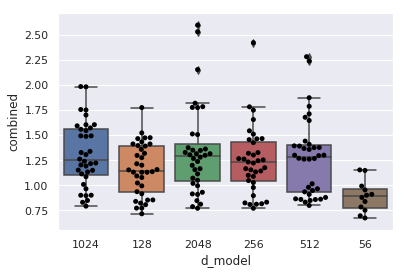

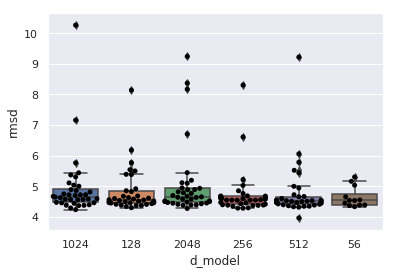

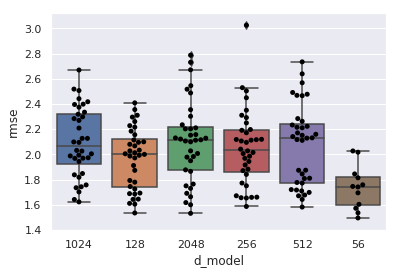

In [39]:
def do_loss_plots_on_var(d, var):
    sns.boxplot(x=var, y="combined", data=d)
    sns.swarmplot(x=var, y="combined", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmsd", data=d)
    sns.swarmplot(x=var, y="rmsd", data=d, color="black")
    plt.figure()
    sns.boxplot(x=var, y="rmse", data=d)
    sns.swarmplot(x=var, y="rmse", data=d, color="black")

do_loss_plots_on_var(mins, "d_model")

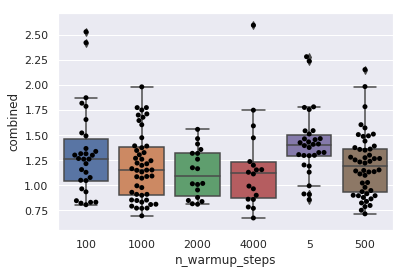

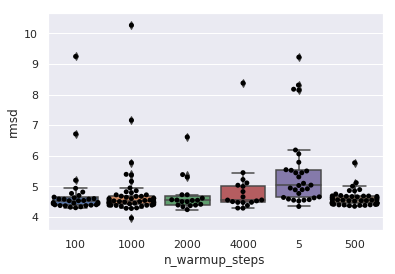

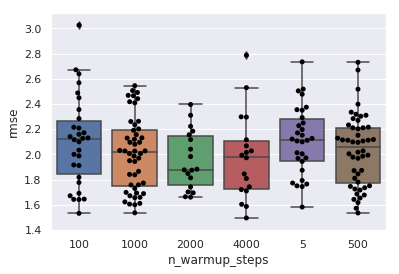

In [40]:
do_loss_plots_on_var(mins, "n_warmup_steps")

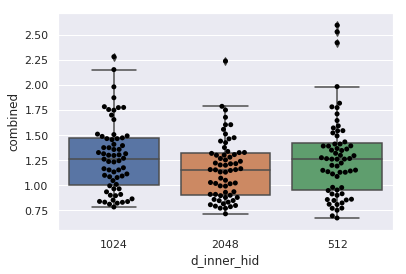

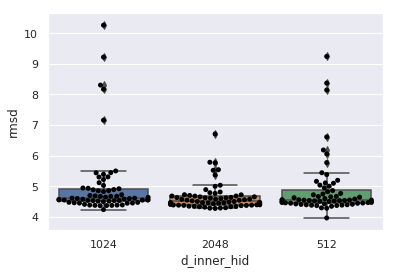

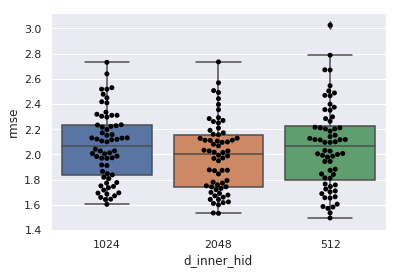

In [41]:
do_loss_plots_on_var(mins, "d_inner_hid")

In [42]:
summary = mins[["title", "combined", "drmsd", "rmsd", "rmse", "d_model", "n_warmup_steps", "d_inner_hid"]]

In [43]:
" ".join(summary["title"][:10].to_list())

'0530-3p7kc-003 0530-3p7kc-001 0530-3p7kb-042 0530-3p7kc-000 0530-3p7kb-059 0530-3p7kc-011 0530-3p7kb-043 0530-3p7k-003 0530-3p7kc-027 0530-3p7k-058'

In [44]:
summary

,title,combined,drmsd,rmsd,rmse,d_model,n_warmup_steps,d_inner_hid
232,0530-3p7kc-003,0.674163,1.837088,4.660412,1.495787,56,4000,512
190,0530-3p7kc-001,0.695594,1.687398,5.166474,1.536401,56,1000,512
76,0530-3p7kb-042,0.715568,2.021644,4.636816,1.535207,128,500,2048
107,0530-3p7kc-000,0.751560,2.135029,4.540528,1.572413,56,500,512
31,0530-3p7kb-059,0.770508,2.083386,4.281431,1.600371,2048,1000,2048
252,0530-3p7kc-011,0.770745,2.259470,4.555572,1.586856,256,4000,512
185,0530-3p7kb-043,0.772319,1.971725,4.603945,1.611318,128,1000,2048
64,0530-3p7k-003,0.772406,2.046930,4.528007,1.605581,128,1000,512
262,0530-3p7kc-027,0.783765,2.248135,4.559482,1.604066,56,4000,1024
116,0530-3p7k-058,0.786873,2.122737,4.584381,1.617655,2048,500,2048
